# Example 1
Basic usage with an image stack and reference image in the correct format. 

Until the repo is made public you'll be required to enter a git token. This can be created by going to [GitHub](https://docs.github.com/en/github/authenticating-to-github/creating-a-personal-access-token) and only ticking the repo. Do not share this key. 

In [2]:
from getpass import getpass
TOKEN = getpass('Enter the git token: ')

Enter the git token: ········


Clone and install repo locally and download the example data if you have not already done this in the current working directory.

In [4]:
!git clone https://$TOKEN@github.com/rg314/pytraction.git
!pip install pytraction/

fatal: destination path 'pytraction' already exists and is not an empty directory.
Processing ./pytraction


  Created wheel for pytraction: filename=pytraction-0.0.0-py3-none-any.whl size=23234 sha256=d2e7ba1a6d4c5a0dcecc20f0d4b5b6754542c8493bab0333de881bd2f99cd4f6
  Stored in directory: /private/var/folders/4d/mg882fv55ml4cxlqrcq2903r0000gn/T/pip-ephem-wheel-cache-lo69zpi0/wheels/bd/4b/16/79a5a67ff277ec1a5f35238e56faf3737ffc9a0d45f50f5d9e
Successfully built pytraction
  Attempting uninstall: pytraction
    Found existing installation: pytraction 0.0.0
    Uninstalling pytraction-0.0.0:
      Successfully uninstalled pytraction-0.0.0


In [6]:
!pytraction_get_data

  File "/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/urllib3/connection.py", line 169, in _new_conn
    conn = connection.create_connection(
  File "/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/urllib3/util/connection.py", line 73, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/urllib3/connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/urllib3/connectionpool.py", line 38

In [13]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

from pytraction.core import TractionForce
from pytraction.utils import plot

In [14]:
pix_per_um = 1.3 # The number of pixels per micron 
E = 100 # Youngs modulus in Pa

img_path = 'data/example1/e01_pos1_axon1.tif'
ref_path = 'data/example1/e01_pos1_axon1_ref.tif'

We can instantiate the traction force object ```TractionForce``` by passing the pixel per microns and Young’s modules (Pa). There's optional argument of minimum window size. The window size needs to be a multiple of base 2 i.e. 8, 16, 32, 64. From initial data we’ve found that a parameter between 8 and 64 will be suitable and depends on the bead density of the input images. If the minimum window size is not provided it is calculated based on bead density using KNN model.

In [15]:
traction_obj = TractionForce(pix_per_um, E=E) # config TractionForce object
img, ref, _ = traction_obj.load_data(img_path, ref_path) # we can load the dat using the load_data method

print(f'The expected shape of the image is {img.shape}')
print(f'The expected shape of the reference is {ref.shape}')

The expected shape of the image is (13, 2, 362, 641)
The expected shape of the reference is (2, 362, 641)


Notice the shape of the input image is ```(time, channels, width, height)``` and the reference is ```(channels, width, height)```. This is the expected format that the package takes so please ensure that your data is in this format. If you are having issues please contact us and we can give you advice on how to prepare your data.

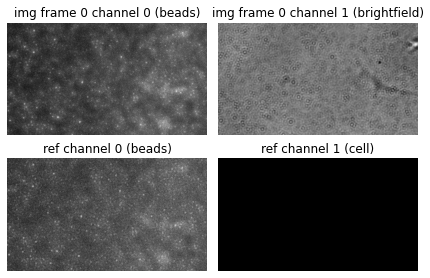

In [16]:
fig, ax = plt.subplots(2,2)
ax[0,0].set_title('img frame 0 channel 0 (beads)')
ax[0,0].imshow(img[0,0,:,:], cmap='gray')
ax[0,0].set_axis_off()

ax[0,1].set_title('img frame 0 channel 1 (brightfield)')
ax[0,1].imshow(img[0,1,:,:], cmap='gray')
ax[0,1].set_axis_off()

ax[1,0].set_title('ref channel 0 (beads)')
ax[1,0].imshow(ref[0,:,:], cmap='gray')
ax[1,0].set_axis_off()

ax[1,1].set_title('ref channel 1 (cell)')
ax[1,1].imshow(ref[1,:,:], cmap='gray')
ax[1,1].set_axis_off()

plt.tight_layout()

We can now process the stack to get the TFM results. We can set the verbose to 0 to stop any print statements. When the verbose is set to 1 the iterative PIV and the TFM function minimization is printed.

In [ ]:
log1 = traction_obj.process_stack(img, ref, verbose=1)

Unzipping...Done.
Automatically selected window size of 32
----------------------------------------------------------
|----->     ||   The Open Source  P article              |
| Open      ||                    I mage                 |
|     PIV   ||                    V elocimetry  Toolbox  |
|     <-----||   www.openpiv.net          version 1.0    |
----------------------------------------------------------
 
('Algorithm : ', 'WiDIM')
 
Parameters   
-----------------------------------
('     ', 'Size of image', ' | ', [362, 641])
('     ', 'total number of iterations', ' | ', 1)
('     ', 'overlap ratio', ' | ', 0.5)
('     ', 'coarse factor', ' | ', 0)
('     ', 'time step', ' | ', 1.0)
('     ', 'validation method', ' | ', 'mean_velocity')
('     ', 'number of validation iterations', ' | ', 3)
('     ', 'subpixel_method', ' | ', 'gaussian')
('     ', 'Nrow', ' | ', array([21], dtype=int32))
('     ', 'Ncol', ' | ', array([39], dtype=int32))
('     ', 'Window sizes', ' | ', array([

/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:1971: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:2015: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))


    2         618034     -11031.9        golden
    3         236068     -11130.2        golden
    4         145898     -11207.1        golden
    5        90169.9     -11305.3        golden
    6        55728.1     -11422.5        golden
    7        34441.9     -11550.3        golden
    8        21286.2     -11673.5        golden
    9        13155.6     -11772.8        golden
   10        8130.62     -11830.2        golden
   11           5025     -11833.9        golden
   12        6093.46     -11839.3        parabolic
   13        6380.36     -11839.3        parabolic
   14        6193.75     -11839.4        parabolic
   15        6183.25     -11839.4        parabolic
   16        6181.94     -11839.4        parabolic
   17        6181.84     -11839.4        parabolic
   18        6181.84     -11839.4        parabolic
   19        6181.84     -11839.4        parabolic
   20        6181.84     -11839.4        parabolic
   21        6181.84     -11839.4        golden
   22        

/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:1971: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:2015: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))


   11        10152.1       -12884        parabolic
   12        10433.8     -12883.9        parabolic
   13        10151.7       -12884        parabolic
   14        10114.8       -12884        parabolic
   15        9356.92     -12883.3        golden
   16          10116       -12884        parabolic
   17        10116.1       -12884        parabolic
   18        10116.1       -12884        parabolic
   19        10116.1       -12884        parabolic
   20        10116.1       -12884        parabolic
   21        10116.1       -12884        golden
   22        10116.1       -12884        golden
   23        10116.1       -12884        golden
   24        10116.1       -12884        golden
   25        10116.1       -12884        golden
   26        10116.1       -12884        golden
   27        10116.1       -12884        golden
   28        10116.1       -12884        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1

/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:1971: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:2015: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))


   11        19595.6     -13245.4        parabolic
   12        17135.7       -13244        golden
   13        19096.6     -13245.6        parabolic
   14        19021.7     -13245.6        parabolic
   15          18985     -13245.6        parabolic
   16        18987.4     -13245.6        parabolic
   17        18987.5     -13245.6        parabolic
   18        18987.5     -13245.6        parabolic
   19        18987.5     -13245.6        parabolic
   20        18987.5     -13245.6        parabolic
   21        18987.5     -13245.6        golden
   22        18987.5     -13245.6        golden
   23        18987.5     -13245.6        golden
   24        18987.5     -13245.6        golden
   25        18987.5     -13245.6        golden
   26        18987.5     -13245.6        golden
   27        18987.5     -13245.6        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )
Time taken 0.22298598289489746 s
Unzippin

/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:1971: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:2015: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))


   11        12857.9     -12770.8        parabolic
   12        11898.9     -12771.8        parabolic
   13        10459.5     -12771.1        golden
   14        11564.2       -12772        parabolic
   15        11522.1       -12772        parabolic
   16          11499       -12772        parabolic
   17        11500.6       -12772        parabolic
   18        11500.6       -12772        parabolic
   19        11500.6       -12772        parabolic
   20        11500.6       -12772        parabolic
   21        11500.6       -12772        golden
   22        11500.6       -12772        golden
   23        11500.6       -12772        golden
   24        11500.6       -12772        golden
   25        11500.6       -12772        parabolic
   26        11500.6       -12772        parabolic
   27        11500.6       -12772        parabolic

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )
Time taken 0.22960710525512695 s

/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:1971: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:2015: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))


   10        8130.62     -10837.6        golden
   11           5025     -10820.6        golden
   12        8567.48     -10836.6        parabolic
   13        7820.98     -10838.1        parabolic
   14        6753.01     -10836.8        golden
   15         7609.4     -10838.2        parabolic
   16        7558.54     -10838.2        parabolic
   17        7570.59     -10838.2        parabolic
   18        7571.06     -10838.2        parabolic
   19        7571.02     -10838.2        parabolic
   20        7571.02     -10838.2        parabolic
   21        7571.02     -10838.2        parabolic
   22        7571.04     -10838.2        golden
   23        7571.03     -10838.2        golden
   24        7571.03     -10838.2        golden
   25        7571.02     -10838.2        golden
   26        7571.02     -10838.2        parabolic
   27        7571.02     -10838.2        golden
   28        7571.02     -10838.2        parabolic
   29        7571.02     -10838.2        golden

Optimi

/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:1971: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:2015: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))


Done.
Unzipping...Done.
Automatically selected window size of 32
----------------------------------------------------------
|----->     ||   The Open Source  P article              |
| Open      ||                    I mage                 |
|     PIV   ||                    V elocimetry  Toolbox  |
|     <-----||   www.openpiv.net          version 1.0    |
----------------------------------------------------------
 
('Algorithm : ', 'WiDIM')
 
Parameters   
-----------------------------------
('     ', 'Size of image', ' | ', [362, 641])
('     ', 'total number of iterations', ' | ', 1)
('     ', 'overlap ratio', ' | ', 0.5)
('     ', 'coarse factor', ' | ', 0)
('     ', 'time step', ' | ', 1.0)
('     ', 'validation method', ' | ', 'mean_velocity')
('     ', 'number of validation iterations', ' | ', 3)
('     ', 'subpixel_method', ' | ', 'gaussian')
('     ', 'Nrow', ' | ', array([21], dtype=int32))
('     ', 'Ncol', ' | ', array([39], dtype=int32))
('     ', 'Window sizes', ' | ', a

/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:1971: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:2015: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))


Done.
Unzipping...Done.
Automatically selected window size of 32
----------------------------------------------------------
|----->     ||   The Open Source  P article              |
| Open      ||                    I mage                 |
|     PIV   ||                    V elocimetry  Toolbox  |
|     <-----||   www.openpiv.net          version 1.0    |
----------------------------------------------------------
 
('Algorithm : ', 'WiDIM')
 
Parameters   
-----------------------------------
('     ', 'Size of image', ' | ', [362, 641])
('     ', 'total number of iterations', ' | ', 1)
('     ', 'overlap ratio', ' | ', 0.5)
('     ', 'coarse factor', ' | ', 0)
('     ', 'time step', ' | ', 1.0)
('     ', 'validation method', ' | ', 'mean_velocity')
('     ', 'number of validation iterations', ' | ', 3)
('     ', 'subpixel_method', ' | ', 'gaussian')
('     ', 'Nrow', ' | ', array([21], dtype=int32))
('     ', 'Ncol', ' | ', array([39], dtype=int32))
('     ', 'Window sizes', ' | ', a

/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:1971: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))
/Users/ryan/miniconda3/envs/pytraction/lib/python3.8/site-packages/scipy/optimize/optimize.py:2015: ComplexWarning: Casting complex values to real discards the imaginary part
  print("%5.0f   %12.6g %12.6g %s" % (fmin_data + (step,)))


   10        9215.48     -12101.5        parabolic
   11        15831.7     -12113.6        parabolic
   12        14548.4     -12114.1        parabolic
   13          14528     -12114.1        parabolic
   14        14444.4     -12114.1        parabolic
   15        14454.2     -12114.1        parabolic
   16        14454.4     -12114.1        parabolic
   17        14454.4     -12114.1        parabolic
   18        14454.4     -12114.1        parabolic
   19        14454.3     -12114.1        golden
   20        14454.4     -12114.1        golden
   21        14454.4     -12114.1        golden
   22        14454.4     -12114.1        parabolic
   23        14454.4     -12114.1        parabolic
   24        14454.4     -12114.1        parabolic
   25        14454.4     -12114.1        parabolic
   26        14454.4     -12114.1        golden

Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol =  1e-05 )
Time taken 0.2238547801971435

A pandas DataFrame with the following columns: 

| Columns       | Description |
| :----------- | :----------- |
| frame      | frame number       |
| traction_map   | (n, m) numpy.ndarray of traction stress in Pa |
| force_field   | (n, m, 2) numpy.ndarray of x and y force components  |
| stack_bead_roi   | (2, w, h) numpy.ndarray of image stack before and after deformation after alignment |
| cell_roi   | (w, h) numpy.ndarray of cell in frame |
| mask_roi   | (w, h) numpy.ndarray of binary mask 0 is background and 1 is cell |
| beta   | parameter quantifying the noise in the image |
| L   | optimized regularization parameter |
| pos   | (2, N) positions from PIV of x and y. N depends on the minimum window size |
| vec   | (2, N) displacement from PIV of U and V. N depends on the minimum window size |

In [ ]:
log1.head(1)

We can plot the traction maps using the plot function that takes the returned DataFrame and we can iterate through the frame number.

In [ ]:
for frame in range(len(log1)):
    plot(log1, frame=frame, vmax=3)